#📌 Extracão

In [28]:
import json


#Load the JSON data

with open('TelecomX_Data.json','r') as f:
    data = json.load(f)

print(data)


Output hidden; open in https://colab.research.google.com to view.

#🔧 Transformação

In [52]:
import pandas as pd

df = pd.DataFrame(data)

print(df)

      customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'Phone

In [30]:
# Valores ausentes
print(df.isna())

      customerID  Churn  customer  phone  internet  account
0          False  False     False  False     False    False
1          False  False     False  False     False    False
2          False  False     False  False     False    False
3          False  False     False  False     False    False
4          False  False     False  False     False    False
...          ...    ...       ...    ...       ...      ...
7262       False  False     False  False     False    False
7263       False  False     False  False     False    False
7264       False  False     False  False     False    False
7265       False  False     False  False     False    False
7266       False  False     False  False     False    False

[7267 rows x 6 columns]


In [31]:
# Preenchimento deles
df.fillna(-1, inplace=True)
print(df)

      customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'Phone

In [39]:
# Averiguar a duplicidade de dados a partir da coluna customerID - sugestão Gemini

print(df.duplicated(subset=['customerID']).sum())

0


In [40]:
# Descobrindo os tipos de dados das colunas

print(df.dtypes)

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [41]:
# Verificando se há linhas sem valores - outro modo

ausentes = df.isna().any(axis=1)
print(ausentes)

0       False
1       False
2       False
3       False
4       False
        ...  
7262    False
7263    False
7264    False
7265    False
7266    False
Length: 7267, dtype: bool


In [68]:
# Coluna de Contas Diárias - mostrar o valor do faturamento da empresa
# Criando um df para tabela account

df_account = pd.DataFrame(df['account'])

print(df_account)



                                                account
0     {'Contract': 'One year', 'PaperlessBilling': '...
1     {'Contract': 'Month-to-month', 'PaperlessBilli...
2     {'Contract': 'Month-to-month', 'PaperlessBilli...
3     {'Contract': 'Month-to-month', 'PaperlessBilli...
4     {'Contract': 'Month-to-month', 'PaperlessBilli...
...                                                 ...
7262  {'Contract': 'One year', 'PaperlessBilling': '...
7263  {'Contract': 'Month-to-month', 'PaperlessBilli...
7264  {'Contract': 'Month-to-month', 'PaperlessBilli...
7265  {'Contract': 'Two year', 'PaperlessBilling': '...
7266  {'Contract': 'Two year', 'PaperlessBilling': '...

[7267 rows x 1 columns]


In [80]:
# Adentrando na tabela Charges

charges = df_account['account'].apply(lambda x: x.get('Charges'))

print(charges)

0          {'Monthly': 65.6, 'Total': '593.3'}
1          {'Monthly': 59.9, 'Total': '542.4'}
2         {'Monthly': 73.9, 'Total': '280.85'}
3        {'Monthly': 98.0, 'Total': '1237.85'}
4          {'Monthly': 83.9, 'Total': '267.4'}
                         ...                  
7262      {'Monthly': 55.15, 'Total': '742.9'}
7263      {'Monthly': 85.1, 'Total': '1873.7'}
7264       {'Monthly': 50.3, 'Total': '92.75'}
7265    {'Monthly': 67.85, 'Total': '4627.65'}
7266      {'Monthly': 59.0, 'Total': '3707.6'}
Name: account, Length: 7267, dtype: object


In [81]:
# Em busca da coluna Total

total = charges.apply(lambda x: x.get('Total'))

print(total)

0         593.3
1         542.4
2        280.85
3       1237.85
4         267.4
         ...   
7262      742.9
7263     1873.7
7264      92.75
7265    4627.65
7266     3707.6
Name: account, Length: 7267, dtype: object


In [88]:
# Achando o faturamento a partir da soma da coluna Total

faturamento = pd.to_numeric(total, errors='coerce').sum()

print(f'O faturamento da TelecomX é: R$ {faturamento}')

O faturamento da TelecomX é: R$ 16548281.85


#📊 Carga e análise

In [91]:
# Verificar quantos clientes deixaram a empresa no total e visualizar os dados

# Calculate the value counts
churn_counts = df['Churn'].value_counts()

# Display the counts
print(churn_counts)

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


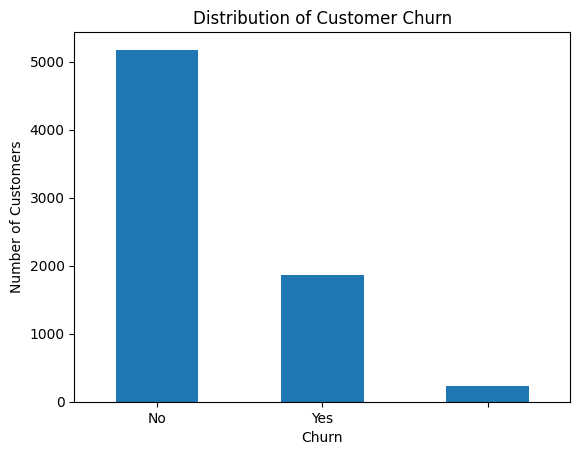

In [89]:
# Verificar quantos clientes deixaram a empresa no total e visualizar em um gráfico

import matplotlib.pyplot as plt

# Calculate the value counts
churn_counts = df['Churn'].value_counts()

# Plot the counts as a bar chart
churn_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Churn')
plt.xticks(rotation=0) # Keep x-axis labels horizontal

# Display the plot
plt.show()

In [51]:
# Achando a porcentagem dessa amostra

df['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.711986
Yes,0.257190
,0.030824


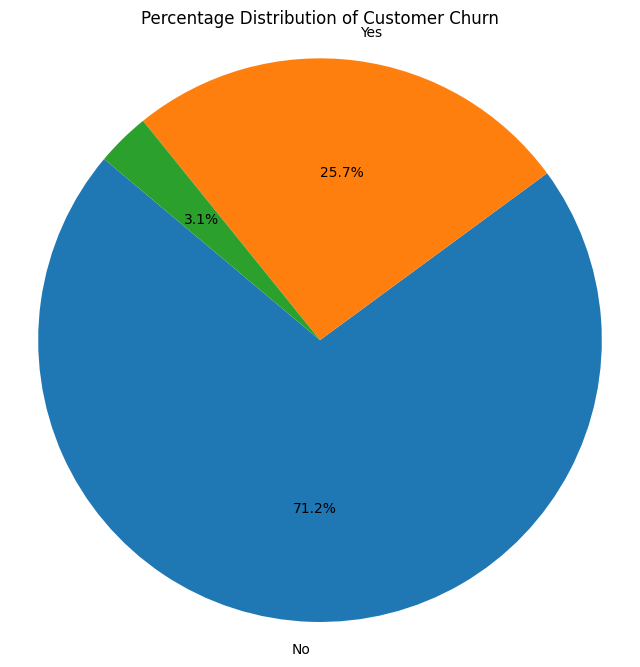

In [90]:
# Achando a porcentagem dessa amostra e visualizando em um gráfico de pizza

import matplotlib.pyplot as plt

# Calculate the percentage of churn
churn_percentage = df['Churn'].value_counts(normalize=True)

# Plot the percentage as a pie chart
plt.figure(figsize=(8, 8)) # Optional: Adjust figure size
plt.pie(churn_percentage, labels=churn_percentage.index, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Percentage Distribution of Customer Churn')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the plot
plt.show()

In [49]:
# Identificando qual é o gênero dos clientes que deixaram a empresa - sugestão Gemini

churned_gender = df[df['Churn'] == 'Yes']['customer'].apply(lambda x: x.get('gender'))

print(churned_gender.value_counts())

customer
Female    939
Male      930
Name: count, dtype: int64


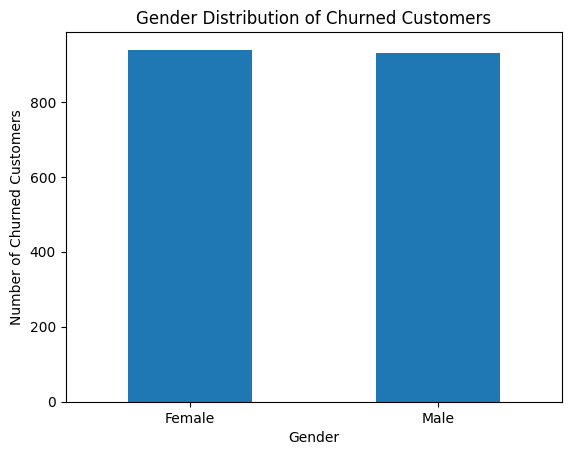

In [92]:
# Identificando qual é o gênero dos clientes que deixaram a empresa e visualizando em um gráfico

import matplotlib.pyplot as plt

# Filter for churned customers and extract 'gender' from the 'customer' column
churned_gender = df[df['Churn'] == 'Yes']['customer'].apply(lambda x: x.get('gender'))

# Calculate the value counts
gender_counts = churned_gender.value_counts()

# Plot the counts as a bar chart
gender_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Churned Customers')
plt.title('Gender Distribution of Churned Customers')
plt.xticks(rotation=0) # Keep x-axis labels horizontal

# Display the plot
plt.show()

#📄Relatorio Final

Relatório

Objetivo:
Realizar um estudo analítico sobre a evasão de clientes por meio de dados didponibilizados pela TelecomX.

Desenvolvimento:

O presente estudo foi realizado dividido em 3 fases: extração, tratamento dos dados e a analise, adiante faremos uma breve narrativa sobre os mesmos.
Na fase Extração foi trabalho a conversão dos dados incialmente contidos no tipo .JSON para a realização de sua leitura no Pyton por meio da utilização do Panda e seu dicionários.
O tratamento de dados foi realizado de modo a buscar inconsistências, que poderiam interferir na analise do conteúdo apresentado, ocasionando prováveis equivocos desturpando a realidade do caso.
Por fim, a análise nos mostra partes relevante do sistema vivenciado pela empresa neste momento o qual é possível obter diagnósticos pertinentes para o auxilio de futuras estratégias para reversão do caso.

Conclusão:

A partir da analise desses dados podemos afirmar que:
- A empresa conta com o registro geral de 7266 pessoas onde 1869 tiveram evasão;
- A evasão de clientes atualmente é em torno de 30%, dos quais praticamente há empate técnico sobre o gênero;
- O faturamento atual da empresa é de R$ 16.548.281,85.

